## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [2]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [37]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=4)

# 建立模型, 進行min_samples_leaf的敏感度分析
sensitivity = [0.5,1,2,3]
for i,x in zip(sensitivity, range(0,len(sensitivity))):
    globals()['clf_%s' % x] = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=i)

# 訓練模型
for x in range(0,len(sensitivity)):
    globals()['clf_%s' % x].fit(x_train, y_train)
    globals()['y_pred_%s' % x] = globals()['clf_%s' % x].predict(x_test)


In [38]:
for x in range(0,len(sensitivity)):
    globals()['acc_%s' % x]= metrics.accuracy_score(y_test, globals()['y_pred_%s' % x])
    print("Acuuracy_{label} = {acc}".format(label= x, acc = globals()['acc_%s' % x]))


Acuuracy_0 = 0.7368421052631579
Acuuracy_1 = 0.9736842105263158
Acuuracy_2 = 0.9736842105263158
Acuuracy_3 = 0.9736842105263158


In [47]:
sensitivity_plt = [globals()['acc_%s' % i] for i in range(0,len(sensitivity))]

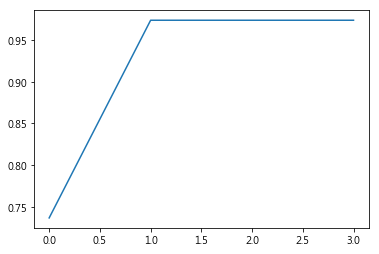

In [51]:
import matplotlib.pyplot as plt
x = [x for x in range(0,len(sensitivity))]
plt.plot(sensitivity_plt)

min_samples_leaf為0.5時準確度會較低，大於1之後則不會影響結果

In [40]:
wine =datasets.load_wine()
x_train , x_test , y_train , y_test = train_test_split(wine.data , wine.target ,  test_size=0.25, random_state=1)

array([0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0, 1,
       0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0,
       1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0,
       1, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2,
       2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 2,
       0])

In [43]:
# 建立模型
clf = DecisionTreeClassifier()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [44]:
acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  0.9555555555555556


In [52]:
boston = datasets.load_boston()
x_train , x_test , y_train , y_test = train_test_split(boston.data , boston.target ,  test_size=0.25 , random_state=1)

In [53]:
# 建立模型
clf = DecisionTreeRegressor()

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [57]:
acc = metrics.mean_squared_error(y_test, y_pred)
print("Acuuracy: ", acc)

Acuuracy:  14.909055118110235
